In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

df = pd.read_csv('telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [372]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Figure size 432x288 with 0 Axes>

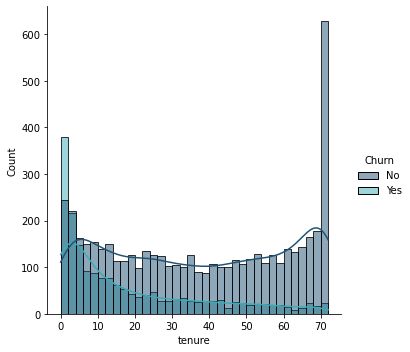

In [374]:
fig = plt.figure()  
ax = sns.displot(data = df, x='tenure', hue = 'Churn', binwidth = 2, kde=True, palette=["#205375", "#3BACB6"])
plt.show() 

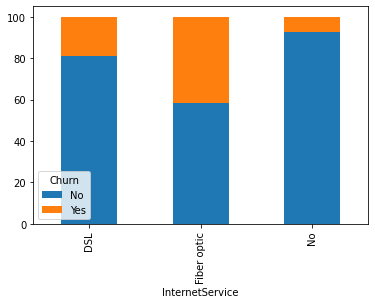

In [375]:
pd.crosstab(df['InternetService'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True)
plt.show()

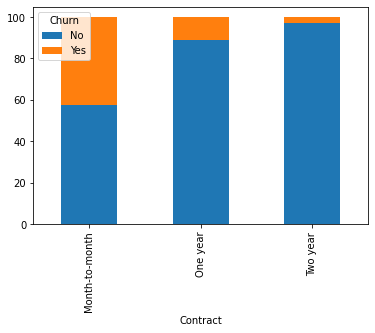

In [376]:
pd.crosstab(df['Contract'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True)
plt.show()

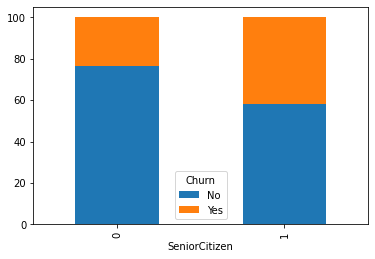

In [377]:
pd.crosstab(df['SeniorCitizen'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True)
plt.show()

In [378]:
df['Churn'].replace(['No', 'Yes'],
                    [0, 1], inplace=True)
df['gender'].replace(['Male', 'Female'],
                    [0, 1], inplace=True)

In [379]:
cols = ['TotalCharges', 'MonthlyCharges']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [380]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [381]:
df.dropna(inplace=True)

In [382]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [384]:
df_encode = df.drop(['customerID','gender', 'SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn'], axis=1)
df_float = df[['gender', 'SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']].copy()

In [385]:
df_encode

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [386]:
df_float

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,29.85,29.85,0
1,0,0,34,56.95,1889.50,0
2,0,0,2,53.85,108.15,1
3,0,0,45,42.30,1840.75,0
4,1,0,2,70.70,151.65,1
...,...,...,...,...,...,...
7038,0,0,24,84.80,1990.50,0
7039,1,0,72,103.20,7362.90,0
7040,1,0,11,29.60,346.45,0
7041,0,1,4,74.40,306.60,1


In [387]:
#Melakukan Integer Encoding dimana tiap nilai unik pada tiap kolom memiliki representasi angka
from pprint import pprint
list_fitur = {}
for nama_fitur in df_encode.columns[:]:
  list_fitur[nama_fitur] = {}
  list_kategori = np.array(df_encode[nama_fitur].unique())
  temp = {}
  for i in range(list_kategori.shape[0]):
    temp[i] = list_kategori[i]
    df_encode[nama_fitur] = np.where(df_encode[nama_fitur]==list_kategori[i],i,df_encode[nama_fitur])
  list_fitur[nama_fitur] = temp
pprint(list_fitur)

{'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
 'Dependents': {0: 'No', 1: 'Yes'},
 'DeviceProtection': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'InternetService': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 'MultipleLines': {0: 'No phone service', 1: 'No', 2: 'Yes'},
 'OnlineBackup': {0: 'Yes', 1: 'No', 2: 'No internet service'},
 'OnlineSecurity': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'PaperlessBilling': {0: 'Yes', 1: 'No'},
 'Partner': {0: 'Yes', 1: 'No'},
 'PaymentMethod': {0: 'Electronic check',
                   1: 'Mailed check',
                   2: 'Bank transfer (automatic)',
                   3: 'Credit card (automatic)'},
 'PhoneService': {0: 'No', 1: 'Yes'},
 'StreamingMovies': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'StreamingTV': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'TechSupport': {0: 'No', 1: 'Yes', 2: 'No internet service'}}


In [388]:
df_encode

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,1,1,0,0,0,1,1,1
2,1,0,1,1,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,1,1,1,0,0,1,1,2
4,1,0,1,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,2,0,1,1,1,1,1,1,1,0,1
7039,0,1,1,2,1,0,0,1,0,1,1,1,0,3
7040,0,1,0,0,0,1,1,0,0,0,0,0,0,0
7041,0,0,1,2,1,0,1,0,0,0,0,0,0,1


In [389]:
dataset = pd.concat([df_encode, df_float], axis="columns")

In [390]:
dataset["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [391]:
#Memilih fitur yang dihilangkan sesuai dari variansinya 
from sklearn.feature_selection import VarianceThreshold
X = dataset.values[:,:-1]#fitur
nama_fitur = dataset.columns[:-1]
selector = VarianceThreshold(threshold=0.1)
selector.fit(X)
deleted_fitur = []
for i in range(len(nama_fitur)):
  if selector.get_support()[i] == False:
    deleted_fitur.append(nama_fitur[i])
print("Fitur yang dihapus\n", deleted_fitur)

Fitur yang dihapus
 ['PhoneService']


In [392]:
for x in deleted_fitur:
  del dataset[x]
dataset.sample(5)

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
67,1,0,1,0,0,0,1,1,1,1,2,1,1,1,0,31,79.20,2497.20,0
3487,0,1,1,2,2,2,2,2,2,2,2,1,2,1,0,52,20.10,1078.75,0
5339,0,1,2,1,0,1,0,0,1,0,0,1,0,0,0,30,85.45,2509.95,0
4298,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,10,46.00,492.10,0
4404,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,24,89.55,2187.15,0


In [393]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

In [394]:
# Model yang dipakai
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))

# Menyimpan model dan hasilnya
results = []
names = []

In [395]:
#Melakukan pemisahan menjadi data latih, label latih, data validasi, dan label validasi
array = dataset.values
X = array[:,:-1]#fitur
y = array[:,-1]#kelas
y=y.astype('int')

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, 
                                                                random_state=101, shuffle=True)

In [396]:
#Melihat perkiraan akurasi untuk tiap model yang digunakan
for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %0.2f akurasi dengan standar deviasi %f' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.76 akurasi dengan standar deviasi 0.008139
NB: 0.67 akurasi dengan standar deviasi 0.009082
Decision Tree: 0.73 akurasi dengan standar deviasi 0.014526


In [397]:
#K-Nearest Neighbour
parameters = {'n_neighbors':[3,5,10],'weights':('uniform','distance'),'algorithm':('ball_tree','kd_tree','brute')} 
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, return_train_score=True)
clf.fit(X_train,Y_train)

pd.concat([pd.DataFrame(clf.cv_results_["params"]),
           pd.DataFrame(clf.cv_results_["mean_train_score"],columns=["Training accuracy"]),
           pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Testing accuracy"]),
           pd.DataFrame(clf.cv_results_["rank_test_score"],columns=["Ranking"])],
          axis=1).sort_values(by=['Ranking'])

,algorithm,n_neighbors,weights,Training accuracy,Testing accuracy,Ranking
4,ball_tree,10,uniform,0.808089,0.776711,1
10,kd_tree,10,uniform,0.808178,0.776533,2
16,brute,10,uniform,0.808222,0.776356,3
17,brute,10,distance,0.998622,0.769956,4
11,kd_tree,10,distance,0.998622,0.769956,4
5,ball_tree,10,distance,0.998622,0.769956,4
2,ball_tree,5,uniform,0.824089,0.762311,7
14,brute,5,uniform,0.823689,0.762133,8
8,kd_tree,5,uniform,0.824044,0.762133,8
9,kd_tree,5,distance,0.998622,0.754844,10


In [398]:
#Multinomial Naive Bayes
parameters = {'alpha':[0.1,1.0,2.0,3.0,1.5],'fit_prior':(True, False)}
naive_bayes = MultinomialNB()
clf = GridSearchCV(naive_bayes, parameters, return_train_score=True)
clf.fit(X_train,Y_train)

pd.concat([pd.DataFrame(clf.cv_results_["params"]),
           pd.DataFrame(clf.cv_results_["mean_train_score"],columns=["Training accuracy"]),
           pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Testing accuracy"]),
           pd.DataFrame(clf.cv_results_["rank_test_score"],columns=["Ranking"])],
          axis=1).sort_values(by=['Ranking'])

,alpha,fit_prior,Training accuracy,Testing accuracy,Ranking
0,0.1,True,0.673289,0.673956,1
4,2.0,True,0.673067,0.673956,1
2,1.0,True,0.673156,0.673778,3
6,3.0,True,0.673022,0.673778,3
8,1.5,True,0.673156,0.673778,3
1,0.1,False,0.665333,0.665422,6
3,1.0,False,0.665244,0.665422,6
7,3.0,False,0.664711,0.665422,6
9,1.5,False,0.665200,0.665422,6
5,2.0,False,0.665067,0.665244,10


In [399]:
#Decision Tree	
parameters = {'splitter':('best', 'random'),'criterion':('gini', 'entropy'),'random_state':[1,51,101]} 
d_tree = DecisionTreeClassifier()
clf = GridSearchCV(d_tree, parameters, return_train_score=True)
clf.fit(X_train,Y_train)
pd.concat([pd.DataFrame(clf.cv_results_["params"]),
           pd.DataFrame(clf.cv_results_["mean_train_score"],columns=["Training accuracy"]),
           pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Testing accuracy"]),
           pd.DataFrame(clf.cv_results_["rank_test_score"],columns=["Ranking"])],
          axis=1).sort_values(by=['Ranking'])

,criterion,random_state,splitter,Training accuracy,Testing accuracy,Ranking
6,entropy,1,best,0.998622,0.734222,1
8,entropy,51,best,0.998622,0.733867,2
10,entropy,101,best,0.998622,0.733333,3
0,gini,1,best,0.998622,0.731200,4
2,gini,51,best,0.998622,0.730667,5
4,gini,101,best,0.998622,0.729244,6
1,gini,1,random,0.998622,0.724444,7
11,entropy,101,random,0.998622,0.723733,8
5,gini,101,random,0.998622,0.720533,9
7,entropy,1,random,0.998622,0.719822,10


In [400]:
modelKNN = KNeighborsClassifier(algorithm='ball_tree',n_neighbors=10,weights='uniform')
modelKNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

In [401]:
modelNB = MultinomialNB(alpha=0.1, fit_prior=True)
modelNB.fit(X_train,Y_train)

MultinomialNB(alpha=0.1)

In [402]:
modelDT = DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=51)
modelDT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=51)

In [403]:
#Fungsi untuk melakukan prediksi sesuai model
def prediksi(model,X_train,Y_train,X_validation):
  predictions = model.predict(X_validation)
  return predictions

In [404]:
prediction = prediksi(modelKNN, X_train, Y_train,  X_validation)
print("Hasil K-Nearest Neighbour:")
print(classification_report(Y_validation, prediction),"\n")

Hasil K-Nearest Neighbour:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1052
           1       0.65      0.40      0.50       355

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.78      0.79      0.78      1407
 



In [405]:
prediction = prediksi(modelNB, X_train, Y_train,  X_validation)
print("Hasil Naive Bayes:")
print(classification_report(Y_validation, prediction),"\n")

Hasil Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1052
           1       0.41      0.74      0.53       355

    accuracy                           0.67      1407
   macro avg       0.65      0.69      0.64      1407
weighted avg       0.76      0.67      0.69      1407
 



In [406]:
prediction = prediksi(modelDT, X_train, Y_train,  X_validation)
print("Hasil Decision Tree:")
print(classification_report(Y_validation, prediction),"\n")

Hasil Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1052
           1       0.46      0.50      0.48       355

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407
 

